# Census Income - Proyect with Random Forest (Modelo 1)

Variables del conjunto de datos "Census Income" de UCI. Este conjunto de datos se utiliza comúnmente para tareas de clasificación, como predecir si una persona gana más o menos de $50,000 al año, en base a sus características. Las caracteristicas son:

1. **age** (edad): La edad de la persona en años.
2. **workclass** (tipo de trabajo): Clasificación del tipo de empleo (e.g., asalariado, autónomo, gobierno).
3. **fnlwgt** (ponderación final): Peso final calculado para las muestras en la encuesta, representa el número de personas que una fila puede representar.
4. **education** (educación): Nivel educativo alcanzado (e.g., escuela secundaria, licenciatura).
5. **education-num** (número de años de educación): Número de años de educación recibidos.
6. **marital-status** (estado civil): Estado civil de la persona (e.g., casado, soltero).
7. **occupation** (ocupación): Tipo de ocupación o profesión de la persona.
8. **relationship** (relación): Relación de la persona con el jefe de familia (e.g., esposo, esposa, hijo).
9. **race** (raza): Clasificación racial de la persona (e.g., blanca, negra, asiática).
10. **sex** (sexo): Sexo de la persona (masculino o femenino).
11. **capital-gain** (ganancia de capital): Ganancias de capital obtenidas por inversiones.
12. **capital-loss** (pérdida de capital): Pérdidas de capital incurridas.
13. **hours-per-week** (horas por semana): Número de horas trabajadas por semana.
14. **native-country** (país de origen): País de nacimiento de la persona.
15. **income** (ingreso): Ingreso anual, clasificado en ">50K" o "<=50K", indicando si la persona gana más o menos de $50,000 al año.



In [1]:
import pandas as pd

# Cargar el archivo de datos principal 'adult.data'
data_path = './adult.data'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
                'marital_status', 'occupation', 'relationship', 'race', 
                'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 
                'native_country', 'income']

# Cargar el dataset en un DataFrame
df = pd.read_csv(data_path, header=None, names=column_names, engine='python')

# Mostrar las primeras filas
df.head(2)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [2]:
import pandas as pd
def data_values(df:pd.DataFrame):
    '''Muestra los valores de las variables de dos formas:
        1. Variables 'object': Muestra los valores unicos de esta variable
        2. Valores numericos: Muestra el minimo y maximo de estos valores
        
        Parametros:
        df: DataFrame del que se desea visualizar los valores

        '''
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f'{col} ({df[col].dtype})')
            print(df[col].unique())
            print(' ')
        
        else:
            print(f'{col} ({df[col].dtype})')
            print(f'min: {df[col].min()}, max: {df[col].max()}')
            print(' ')

In [3]:
data_values(df)

age (int64)
min: 17, max: 90
 
workclass (object)
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 
fnlwgt (int64)
min: 12285, max: 1484705
 
education (object)
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 
education_num (int64)
min: 1, max: 16
 
marital_status (object)
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 
occupation (object)
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
 
relationship (object)
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'

In [4]:
from tools_ml import recursos_graficos as rg 
rg.histogram(df, 'native_country')

In [5]:
rg.histogram(df, 'income')

In [6]:
rg.histogram(df,'race')

In [7]:
rg.multiple_histogram(df,'income','race')

In [8]:
rg.multiple_histogram(df,'income','native_country')

In [9]:
# Columnas categoricas 
col_categoris = [col for col in df.columns if df[col].dtype == 'object']

# split train - test

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

X = df.drop(['income','native_country','race'], axis=1)
y = df['income']

ord_enc = OrdinalEncoder()
X = pd.DataFrame(ord_enc.fit_transform(X), columns=X.columns)



# Primer Modelo

In [10]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=69)

# Instanciamos el modelo
rf = RandomForestClassifier(n_estimators=14, random_state=69)

# entrenamos el modelo
rf.fit(x_train, y_train)
rf



RandomForestClassifier(n_estimators=14, random_state=69)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
cm_train = confusion_matrix(y_train, y_pred_train)

test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f'accuracy train: {train_accuracy}')
print(f'accuracy test: {test_accuracy}')
print('Confusion Matrix (train)')
print(cm_test)

accuracy train: 0.9927167427167427
accuracy test: 0.8505476507319071
Confusion Matrix (train)
[[6942  505]
 [ 955 1367]]


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7447
        >50K       0.73      0.59      0.65      2322

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



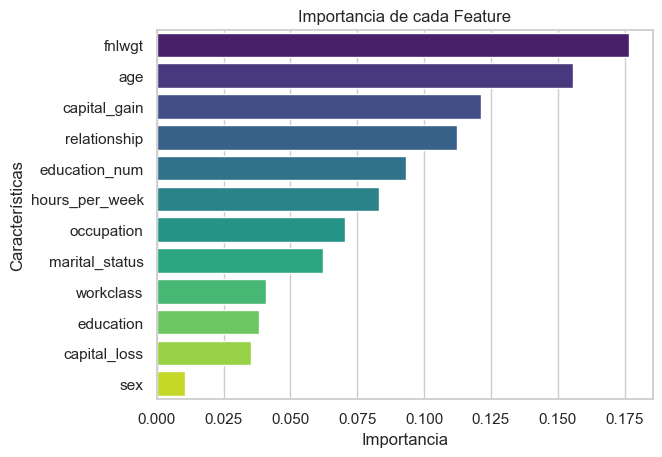

In [13]:
from tools_ml.eval_tree import tree_important_features

tree_important_features(rf, X.columns)

In [16]:
y_pred_origin = rf.predict(X)
print(classification_report(y, y_pred_origin))

              precision    recall  f1-score   support

       <=50K       0.96      0.98      0.97     24720
        >50K       0.93      0.86      0.89      7841

    accuracy                           0.95     32561
   macro avg       0.94      0.92      0.93     32561
weighted avg       0.95      0.95      0.95     32561



In [17]:
confusion_matrix(y, y_pred_origin)

array([[24195,   525],
       [ 1101,  6740]], dtype=int64)